In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Data description

| Column    | Description |
| -------- | ------- |
| work_year  | The year the salary was paid.    |
| experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director     |
| employment_type    | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance   |
| job_title   | The role worked in during the year  |
| salary   | The total gross salary amount paid.  |
| salary_currency    | The currency of the salary paid as an ISO 4217 currency code |
| salary_in_usd   | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com) |
| employee_residence   | Employee's primary country of residence in during the work year as an ISO 3166 country code |
| remote_ratio   | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) |
| company_location   | The country of the employer's main office or contracting branch as an ISO 3166 country code |
| company_size   | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) |

# Loading and clearing data

In [59]:
df = pd.read_csv('ds_salaries.csv')
df.drop(['Unnamed: 0'],axis = 1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# Numerical and categorical variable

In [60]:
print('Columns:')
print(df.columns)
print()
print('Types of data: ')
print(df.dtypes)
print()
print('Categorical data:')
categorical_data = ['work_year','experience_level','employment_type','job_title','salary_currency','employee_residence',
                    'remote_ratio','company_location','company_size']
print(categorical_data)
print()

print('nNumerical data:')
numerical_data = ['salary','salary_In_usd']
print(numerical_data)

Columns:
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Types of data: 
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Categorical data:
['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

nNumerical data:
['salary', 'salary_In_usd']


# Basic statistical measures

In [61]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

<IPython.core.display.Javascript object>


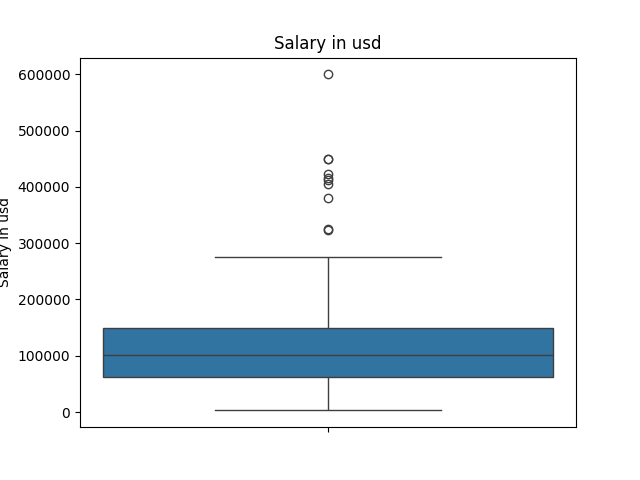

[]

In [62]:
plt.figure()
sns.boxplot(data=df,y='salary_in_usd')
plt.title('Salary in usd')
plt.ylabel('Salary in usd')
plt.plot()

<IPython.core.display.Javascript object>


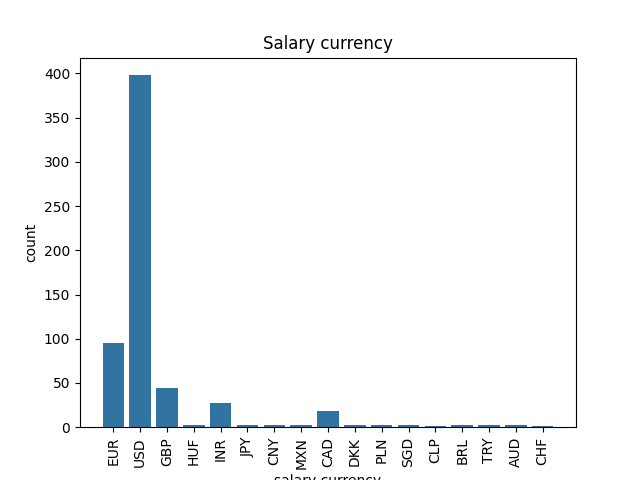

[]

In [63]:
plt.figure()
sns.countplot(df,x = 'salary_currency')
plt.xticks(rotation=90)
plt.title('Salary currency')
plt.xlabel('salary currency')
plt.ylabel('count')
plt.plot()

There are only two numerical variables in this dataset, but I use the describe method to the column 'salary_in_usd' as the 'salary' column refers to diffrent currenties. 

As we can see the average salary in USD is around 112,000, but the std of salary in USD is around 71,000. These statistics suggest a diverse range of earnings among employees. The mean income provides a general sense of the industry's average earnings, while the standard deviation shows substantial variation. The median is lower than the mean, which means that most people earn below average, and there is also a group of outliers as seen on boxplot above. For example, he is a person who earns 600,000$. On the second chart, it is evident that the majority of individuals earn in dollars.

<IPython.core.display.Javascript object>


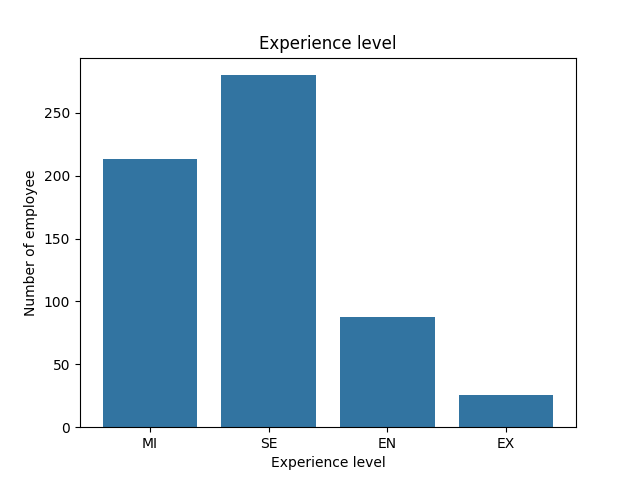

[]

In [64]:
plt.figure()
sns.countplot(df, x = 'experience_level')
plt.title('Experience level')
plt.xlabel('Experience level')
plt.ylabel('Number of employee')
plt.plot()

<IPython.core.display.Javascript object>


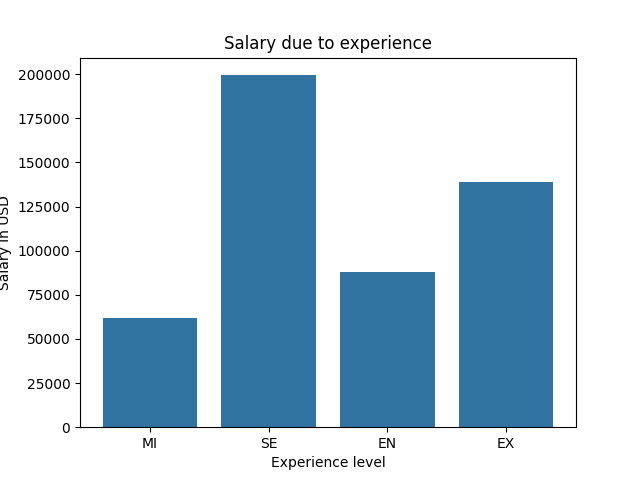

[]

In [65]:
mean = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure()
sns.barplot(x = df['experience_level'].unique(), y = mean)
plt.title('Salary due to experience')
plt.xlabel('Experience level')
plt.ylabel('Salary in USD')
plt.plot()

<IPython.core.display.Javascript object>


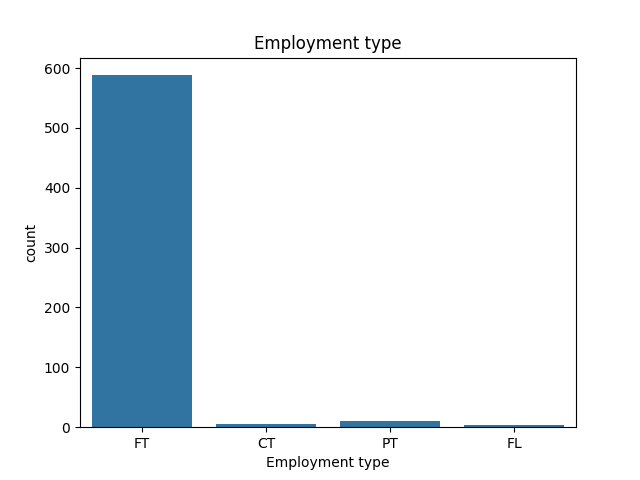

In [66]:
plt.figure()
sns.countplot(df,x = 'employment_type')
plt.xlabel('Employment type')
plt.title('Employment type')
plt.ylabel('count')
plt.show()

Most people work at the senior-level. There are also a lot of people working at the mid-level. Most people work at the senior level. There are also a lot of people working at the mid-level. However, when it comes to earnings, people at the senior level earn the most and those at the mid-level earn the least. As we can see most employees work full time.

<IPython.core.display.Javascript object>


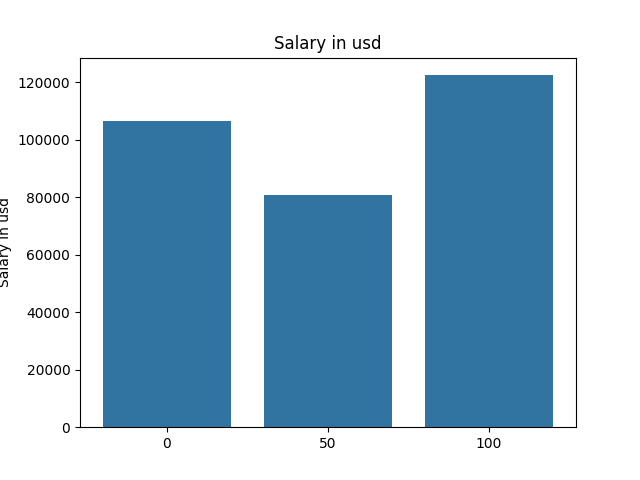

[]

In [67]:
plt.figure()
sns.barplot(x = df['remote_ratio'].unique(), y = df.groupby('remote_ratio')['salary_in_usd'].mean())
plt.ylabel('Remote ratio')
plt.title('Salary in usd')
plt.ylabel('Salary in usd')
plt.plot()

When it comes to remote work, we do not clearly see that remote work is popular.

<IPython.core.display.Javascript object>


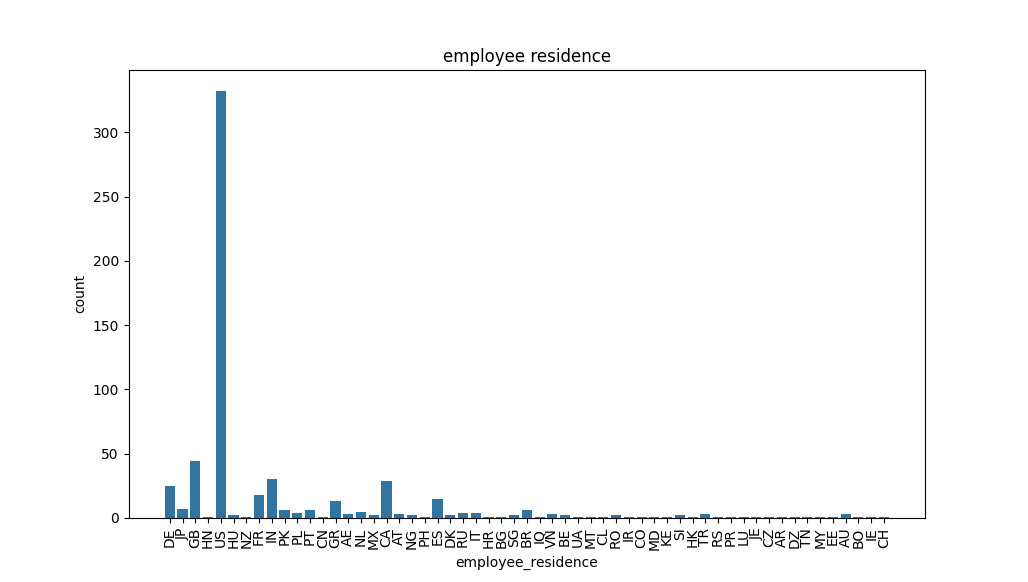

[]

In [68]:
plt.figure()
sns.countplot(df,x = 'employee_residence')
plt.ylabel('employee residence')
plt.title('employee residence')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.plot()

<IPython.core.display.Javascript object>


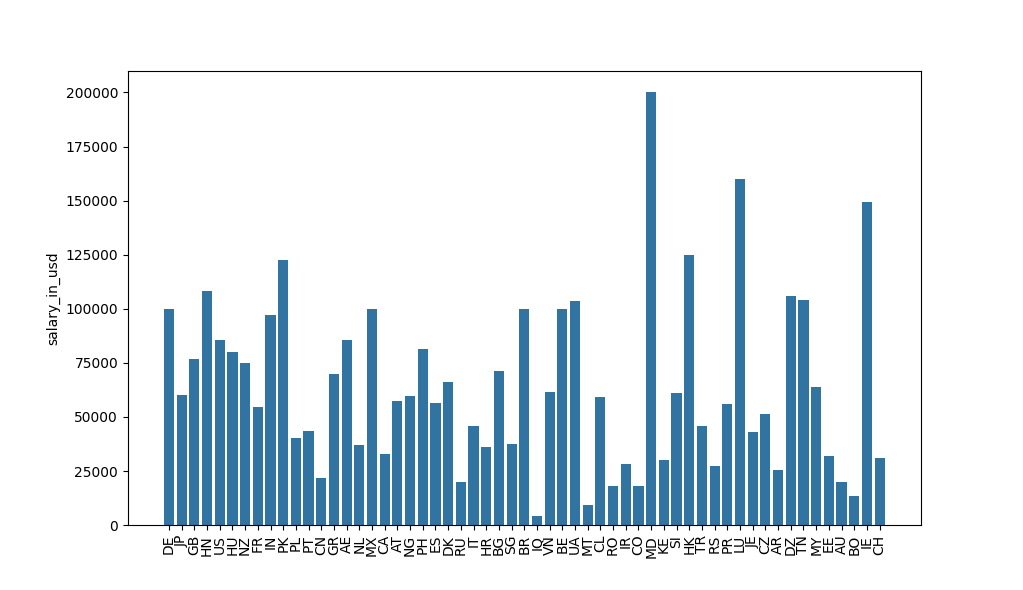

[]

In [69]:
plt.figure()
sns.barplot(x = df['employee_residence'].unique(), y = df.groupby('employee_residence')['salary_in_usd'].mean())
plt.xticks(rotation=90)
plt.plot()

Most people work in the United States, but people from Moldova receive the highest earnings. As you can see in the chart, in most countries you can earn more than in the US, although this may be due to the small amount of data. 

<IPython.core.display.Javascript object>


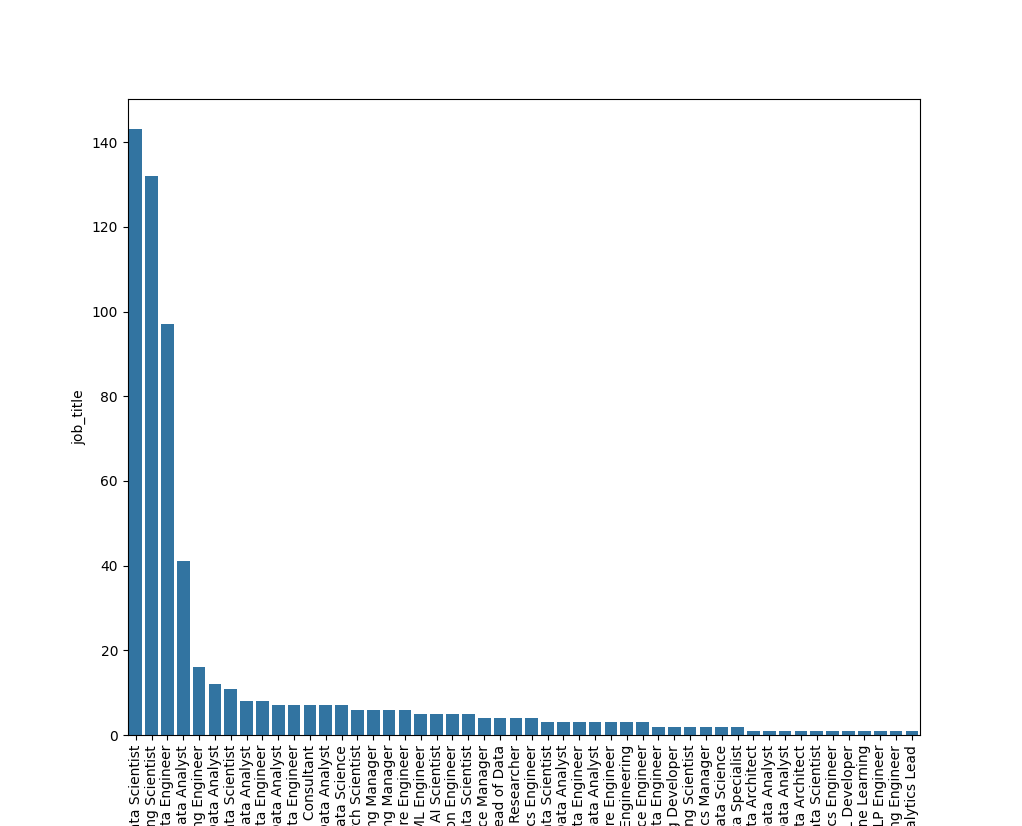

In [70]:
plt.figure()
sns.barplot(x = df['job_title'].unique(), y = df['job_title'].value_counts())
plt.xticks(rotation = 90)
plt.show()

Most people work as Data Scientists

<IPython.core.display.Javascript object>


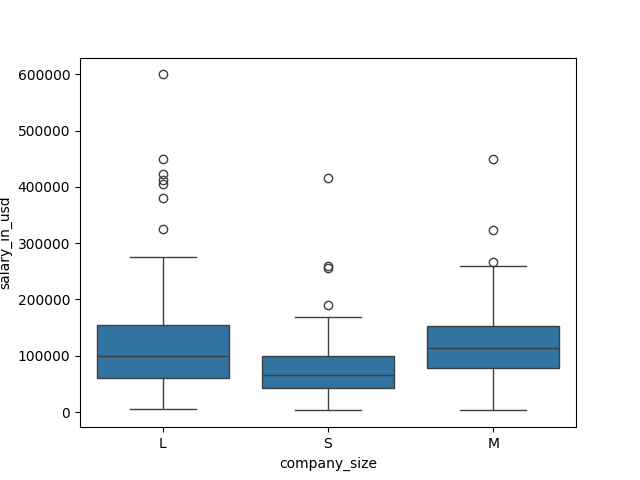

In [71]:
plt.figure()
sns.boxplot(x = 'company_size', y = 'salary_in_usd', data = df)
plt.show()

It can be noticed that earnings do not differ much depending on the size of the company, but you can earn the least in the smallest companies

<IPython.core.display.Javascript object>


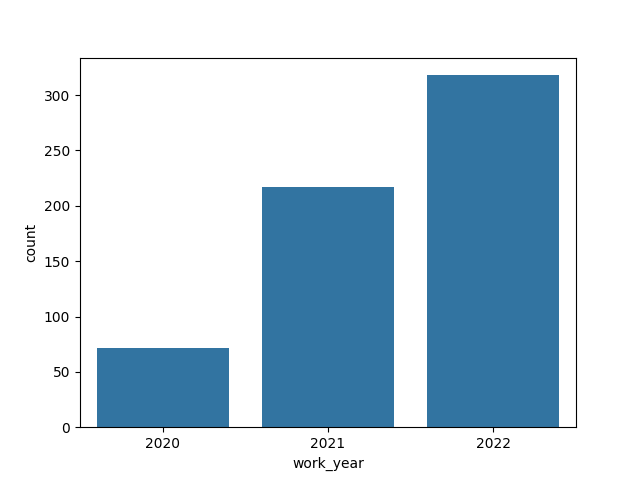

In [72]:
plt.figure()
sns.countplot(df, x = 'work_year')
plt.show()

<IPython.core.display.Javascript object>


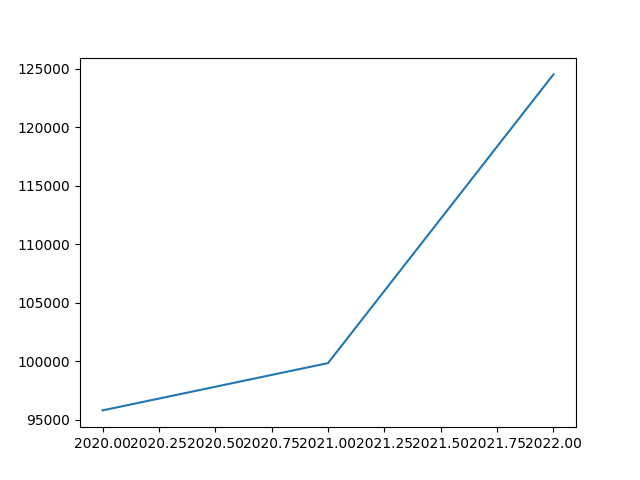

In [73]:
plt.figure()
plt.plot(df['work_year'].unique(), df.groupby('work_year')['salary_in_usd'].mean(), marker='', linestyle='-')
plt.show()

As time passes and employees grow, we may notice that earnings increase significantly.

# Data Scientists

In [74]:
temp = df.loc[(df['job_title']=='Data Scientist')]
temp.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
12,2020,EN,FT,Data Scientist,35000,EUR,39916,FR,0,FR,M


In [75]:
temp['salary_in_usd'].describe()

count       143.000000
mean     108187.832168
std       64112.840519
min        2859.000000
25%       54724.000000
50%      103691.000000
75%      140850.000000
max      412000.000000
Name: salary_in_usd, dtype: float64

<IPython.core.display.Javascript object>


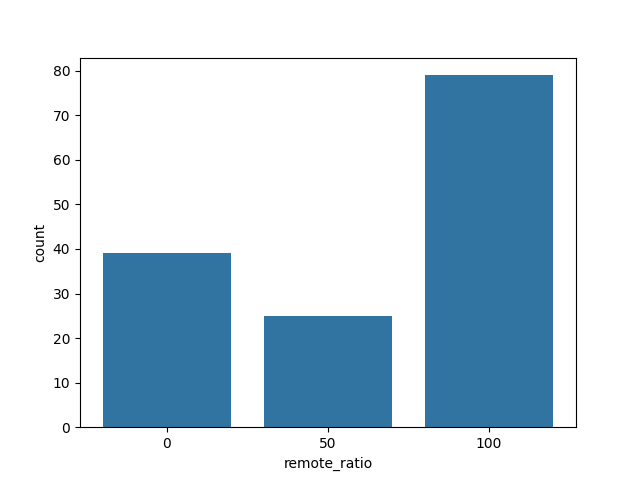

[]

In [76]:
plt.figure()
sns.countplot(temp, x = 'remote_ratio')
plt.plot()

<IPython.core.display.Javascript object>


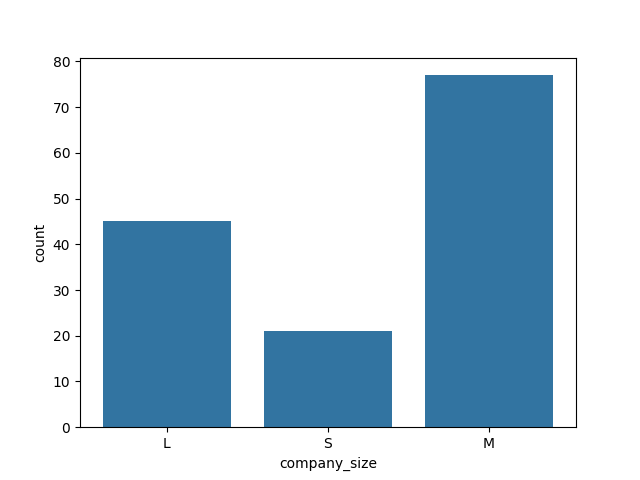

[]

In [77]:
plt.figure()
sns.countplot(temp, x = 'company_size')
plt.plot()

The average salary for Data Scientists in the dataset is approximately $108,000. Among the Data Scientists, the lowest observed salary is $2,859, representing the minimum income recorded in the dataset. In contrast, the highest salary among the Data Scientists is $412,000, illustrating the highest earning in this group.

These statistics collectively provide valuable insights into the distribution of salaries for Data Scientists. The standard deviation and the gap between the median and the mean suggest that the salary distribution is not perfectly symmetrical.

As we can see in the charts, most of them work in medium-sized companies and most often work remotely